<a href="https://colab.research.google.com/github/RubenCedillo123/F-sica---UNAM/blob/main/CedilloSalazar_Algo_T02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [ ]:
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
import astropy.io.fits as aif
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
import pandas as pd

# Cargar Datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Código para la lectura de un archivo en formato FITS

In [ ]:
img = aif.open('/content/drive/MyDrive/Colab Notebooks/Algoritmos /Tarea 2/gc_cosmic.fits')[0].data
print(type(img))
print(img.shape)


imgcos = np.cos(img)
aif.writeto('/content/gc_coseno.fits', imgcos, overwrite=True)

<class 'numpy.ndarray'>
(512, 512)


# Código de Implementación del Algoritmo

* Visulización de la imagen a tratar

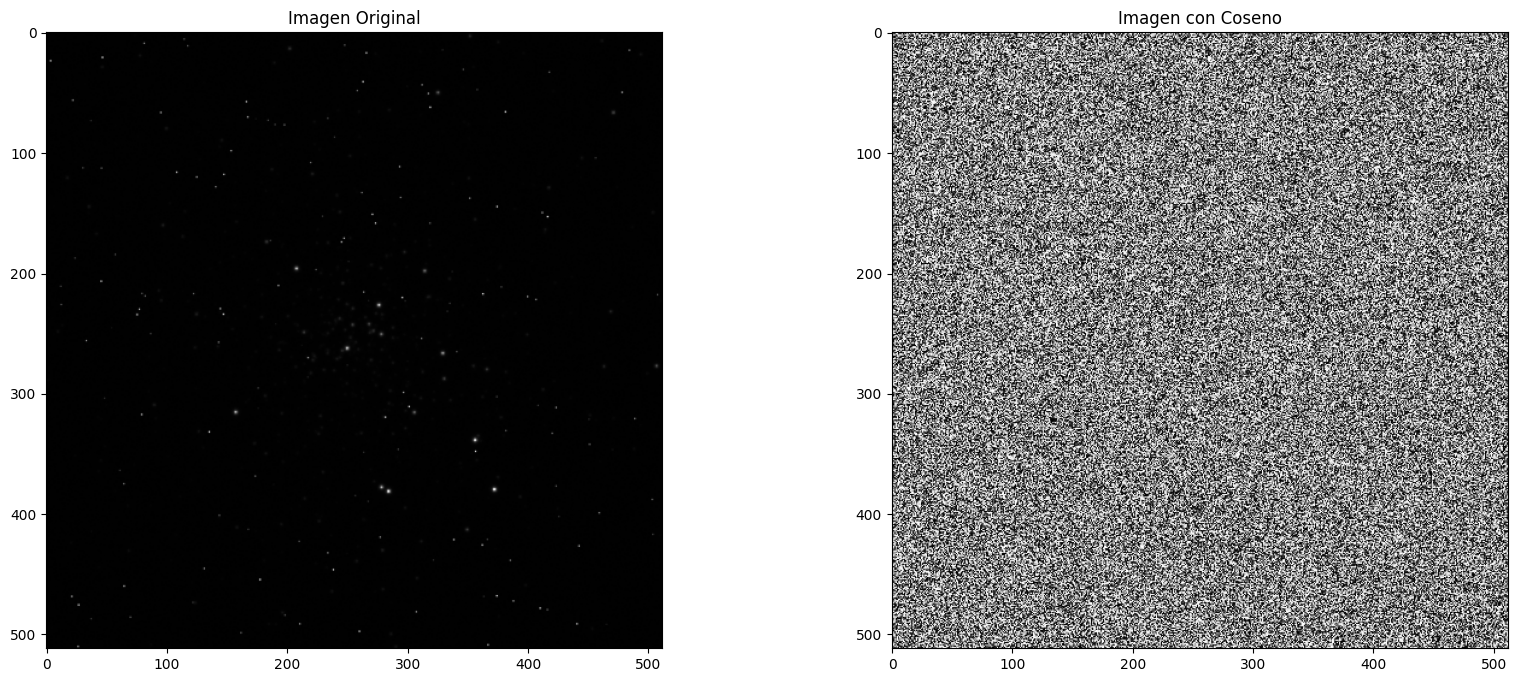

In [ ]:
plt.figure(figsize=(20, 8))

# Imagen Original
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagen Original")


# Imagen con la función coseno (escala la intensidad de los bits en un rango de (-1, 1))
plt.subplot(1, 2, 2)
plt.imshow(imgcos, cmap='gray')
plt.title("Imagen con Coseno")

plt.show()

* Definimos el laplaciano (Ecuación (4))

$\nabla ^2 f(x,y) = \frac{1}{4}\begin{bmatrix}
0 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 0
\end{bmatrix}$

In [ ]:
lp_k = (1/4) * np.array([
                              [0, -1, 0],
                              [-1, 4, -1],
                              [0, -1, 0]
                                    ])

* Vamos a submuesatrear la imagen en un factor 2 para dismunuir su resolución y con ello poder dectectar los rayos cósmicos de mejor manera.

* Definimos la imagen generada por el submuestreo (Ecuación (5)):

$I^{(2)}_{i,j} = I_{\text{int}\left(\frac{i+1}{2}\right), \text{int}\left(\frac{j+1}{2}\right)}$

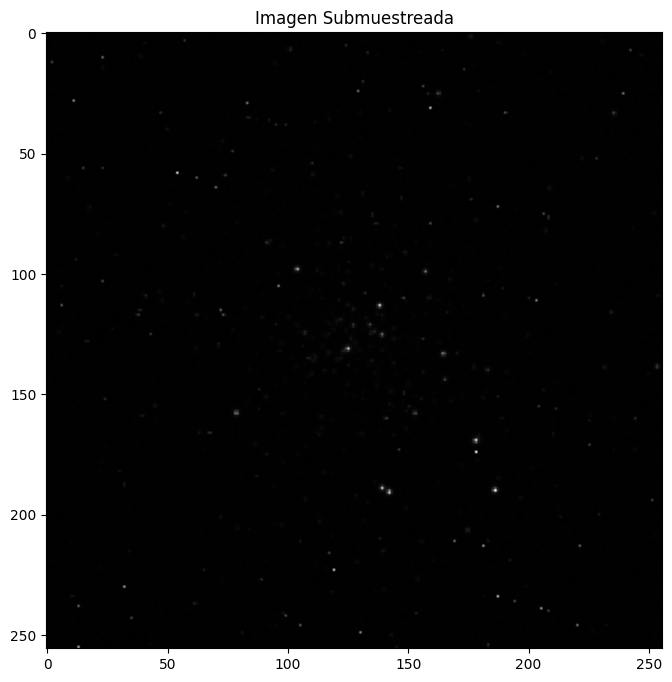

In [ ]:
#De todas las filas y todas las columnas del arreglo tomamos cada dos pasos un elemento:
sub_img = img[::2, ::2]
plt.figure(figsize=(20, 8))
plt.imshow(sub_img, cmap='gray')
plt.title("Imagen Submuestreada")
plt.show()

* Aplicamos el laplaciano (kernel para imagen 2D) en la imagen submuestreada mediante una convlución (Ecuación (6)):

$L^{(2)} = \nabla^2 f * I^{(2)}$

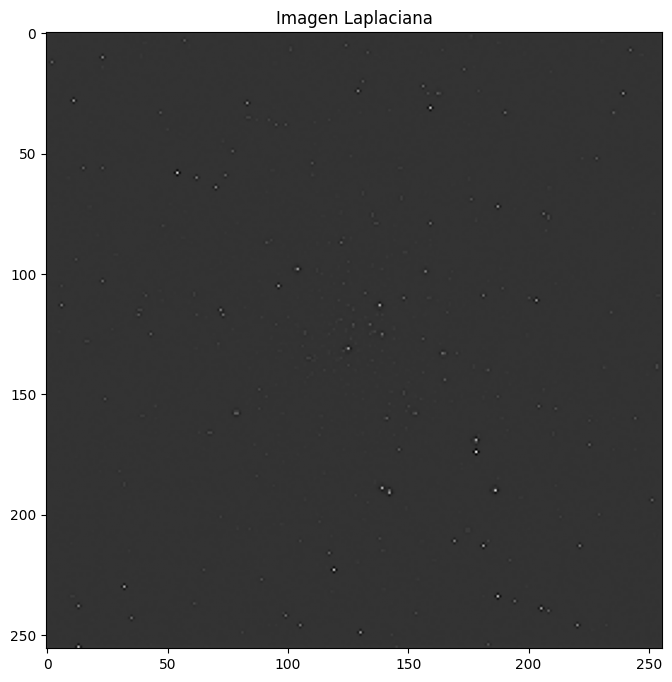

In [ ]:
img_lp = convolve(sub_img, lp_k, mode='constant', cval=0.0)
plt.figure(figsize=(20, 8))
plt.imshow(img_lp, cmap='gray')
plt.title("Imagen Laplaciana")
plt.show()

* La condición para distinguir los rayos cósmicos.
* Mandamos a cero los valores negativos del submuestreo para aislar y distinguir los rayos cósmicos (Ecuación (7)):  

$L^{(2)} =
\begin{cases}
L^{(2)} & \text{si } L^{(2)} \geq 0 \\
0 & \text{si } L^{(2)} < 0
\end{cases}$

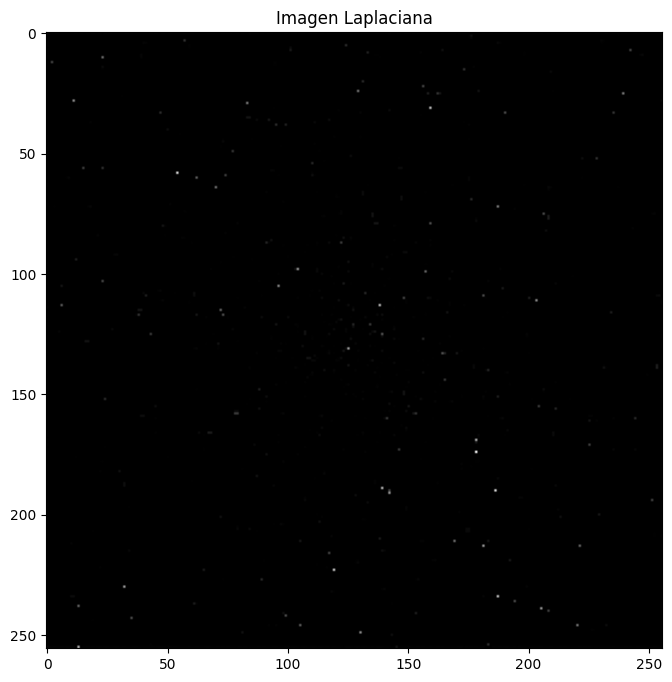

In [ ]:
img_lp[img_lp < 0] = 0
plt.figure(figsize=(20, 8))
plt.imshow(img_lp, cmap='gray')
plt.title("Imagen Laplaciana")
plt.show()

* Hacemos un remuestreo a la escala/resolución original haciendo un promedio con cada uno de los pixeles vecinos:

$L_{i,j} = \frac{1}{4} \left( L^{(2)}_{2i-1,2j-1} + L^{(2)}_{2i-1,2j} + L^{(2)}_{2i,2j-1} + L^{(2)}_{2i,2j} \right)$

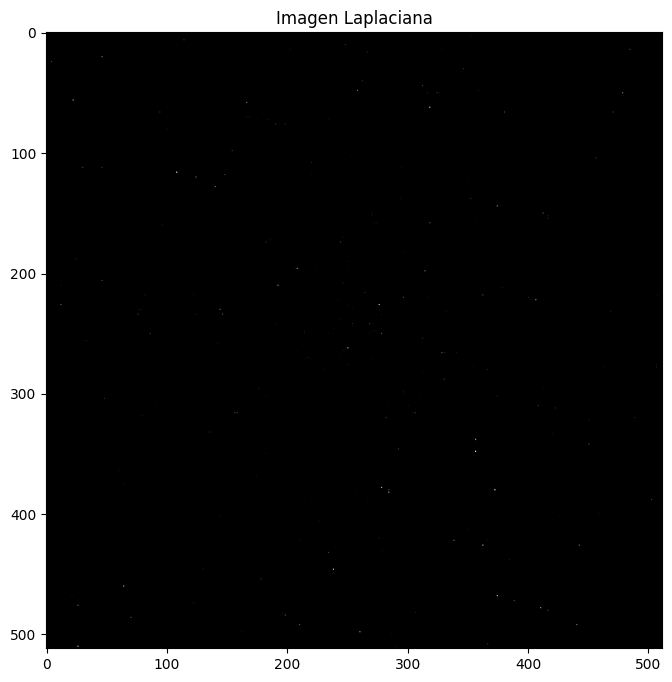

In [ ]:
h, w = img.shape
res_img = np.zeros_like(img)
res_img[::2, ::2] = img_lp
plt.figure(figsize=(20, 8))
plt.imshow(res_img, cmap='gray')
plt.title("Imagen Laplaciana")
plt.show()

* Imagen real vs Imagen laplaciana

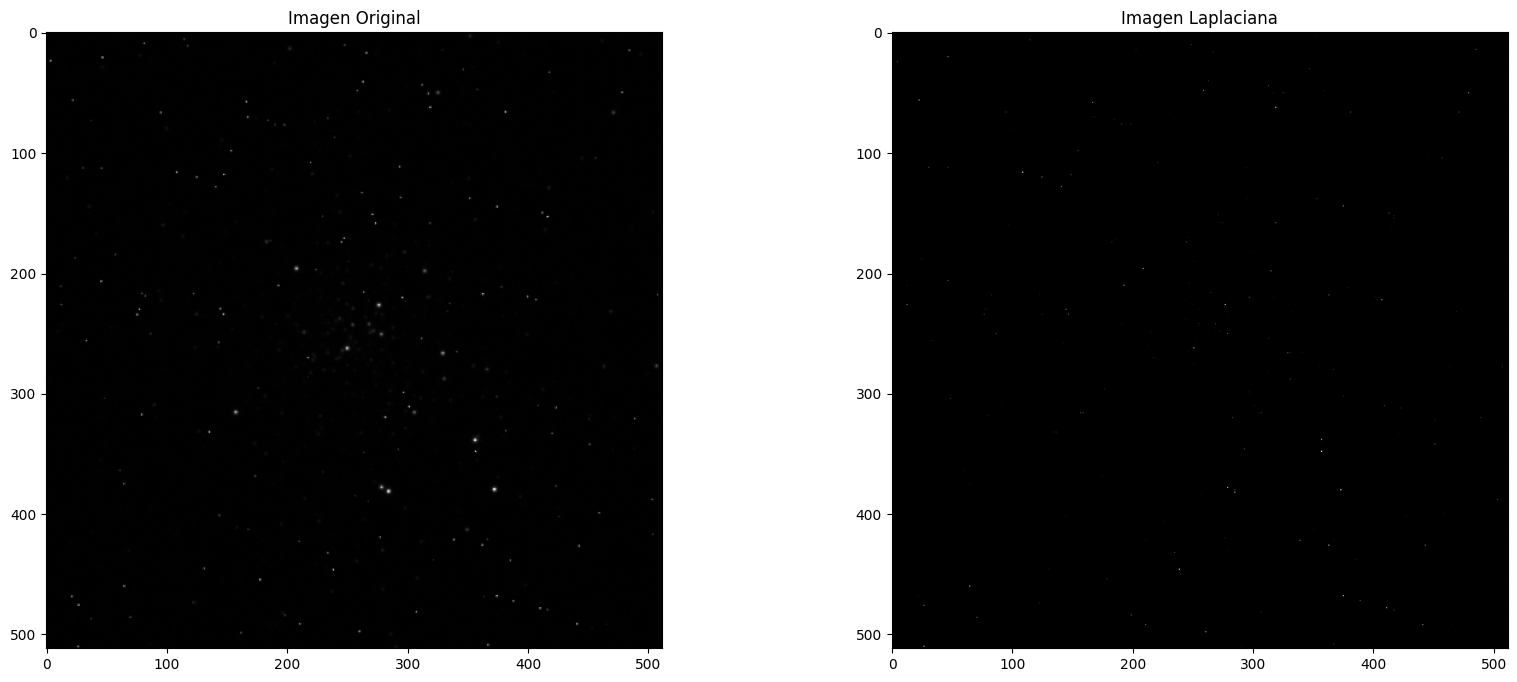

In [ ]:
plt.figure(figsize=(20, 8))

# Imagen Original
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagen Original")


# Imagen Laplaciana
plt.subplot(1, 2, 2)
plt.imshow(res_img, cmap='gray')
plt.title("Imagen Laplaciana")

plt.show()

# Ejercicio 5

In [ ]:
def Aproximado(num_puntos):
    x = np.random.uniform(0, 1, num_puntos)
    y = np.random.uniform(0, 1, num_puntos)
    integral = np.mean(np.exp(-x * y))  # Estimación de la integral
    return integral

iteraciones = [int(1E3), int(1E6), int(1E9)]

# Usar una lista para almacenar los resultados
datos = []

for n in iteraciones:
    result = Aproximado(n)
    datos.append([n, result])

# Convertir la lista en un DataFrame
df_resultados = pd.DataFrame(datos, columns=["Iteraciones", "Valor Aproximado"])

#Este código puede consumir toda la RAM de colab gratuito!
print(df_resultados)